# Tarea 2 Reporte

## Importaciones

In [1]:
from Imagen import info_imagen, calcular_contorno, binarizar_row
import pandas as pd
from tabulate import tabulate
import numpy as np

## Imágenes Originales

In [2]:
Imagenes= ["caballo.jpg", "campana.jpg", "elefante.jpg", "manzana.jpg", "murcielago.jpg", "pato.jpg", "perro.jpg", "pollo.jpg", "rana.jpg", "tortuga.jpg"]


### Información de las Imágenes
La cantidad de pixeles de la imágen, así como los centros de masa y las invariantes $\mu_{pq}, \eta_{pq}, \phi_{1}, \phi_{2}, \phi_{3}$ se obtienen utilizando el módulo `Imagen.py`.
Para obtener la imágen en su formato binario, abrimos la imágen en formato RGB usando la librería `PIL`. Posteriormente, hacemos uso de un *threshold* binarizar cada pixel.

In [4]:
info= [info_imagen(f"./Dataset/{img}") for img in Imagenes]
df= pd.DataFrame(data= info, index=Imagenes)

### Tabla de Resultados

In [5]:
print(tabulate(df, headers='keys', tablefmt='pretty'))

+----------------+----------+--------------------+--------------------+----------+------------------+--------------------+--------+----------+---------+------------------+------------------------+------------------------+
|                | pixeles  |   centro_masa_x    |   centro_masa_y    |  miu_00  |      miu_11      |       miu_22       | eta_00 |  eta_11  | eta_22  |      phi_1       |         phi_2          |         phi_3          |
+----------------+----------+--------------------+--------------------+----------+------------------+--------------------+--------+----------+---------+------------------+------------------------+------------------------+
|  caballo.jpg   | 121436.0 | 266.59657762113375 | 348.85396422807077 | 121436.0 | 1160637105.70753 | 58195623984252.59  |  1.0   |  0.0787  | 0.0325  | 4790589596.53919 | 8.105240018029279e+18  | 1.3669936896785868e+23 |
|  campana.jpg   | 20495.0  | 142.71027079775556 | 125.43600878262991 | 20495.0  |  10857037.02015  | 5648367056

## Imágenes Escaladas
Se ajustaron las imágenes utilizando un editor para que tengan aproximadamente 19,500 1-pixeles en una imágen de 250x250 pixeles
Escalas utilizadas para cada imágen:

| Imagen         | $\alpha$ |
| -------------- | -------- |
| caballo.jpg    | 0.9754   |
| campana.jpg    | 0.4007   |
| elefante.jpg   | 0.2990   |
| manzana.jpg    | 0.8303   |
| murcielago.jpg | 0.4665   |
| pato.jpg       | 0.6311   |
| perro.jpg      | 0.4077   |
| pollo.jpg      | 0.5299   |
| rana.jpg       | 0.6831   |
| tortuga.jpg    | 0.8771   |


In [6]:
Imagenes_Esc= ["caballo_esc.jpg", "campana_esc.jpg", "elefante_esc.jpg", "manzana_esc.jpg", "murcielago_esc.jpg", "pato_esc.jpg", "perro_esc.jpg", "pollo_esc.jpg", "rana_esc.jpg", "tortuga_esc.jpg"]
info_esc= [info_imagen(f"./Dataset_Escalado/{img}") for img in Imagenes_Esc]
df_esc= pd.DataFrame(data= info_esc, index=Imagenes_Esc)

In [7]:
print(tabulate(df_esc, headers='keys', tablefmt='pretty'))

+--------------------+---------+--------------------+--------------------+---------+-----------------+--------------------+--------+----------+---------+-----------------+--------------------+------------------------+
|                    | pixeles |   centro_masa_x    |   centro_masa_y    | miu_00  |     miu_11      |       miu_22       | eta_00 |  eta_11  | eta_22  |      phi_1      |       phi_2        |         phi_3          |
+--------------------+---------+--------------------+--------------------+---------+-----------------+--------------------+--------+----------+---------+-----------------+--------------------+------------------------+
|  caballo_esc.jpg   | 19519.0 | 120.16696552077462 | 138.27829294533532 | 19519.0 | 33134154.04329  | 256058752262.8203  |  1.0   | 0.08697  | 0.03443 | 123706553.17209 | 5411876325080607.0 | 1.4645964802452636e+19 |
|  campana_esc.jpg   | 19504.0 | 139.80732157506154 | 122.93837161607875 | 19504.0 |  9852049.40053  | 48650753674.81947  |  1.0

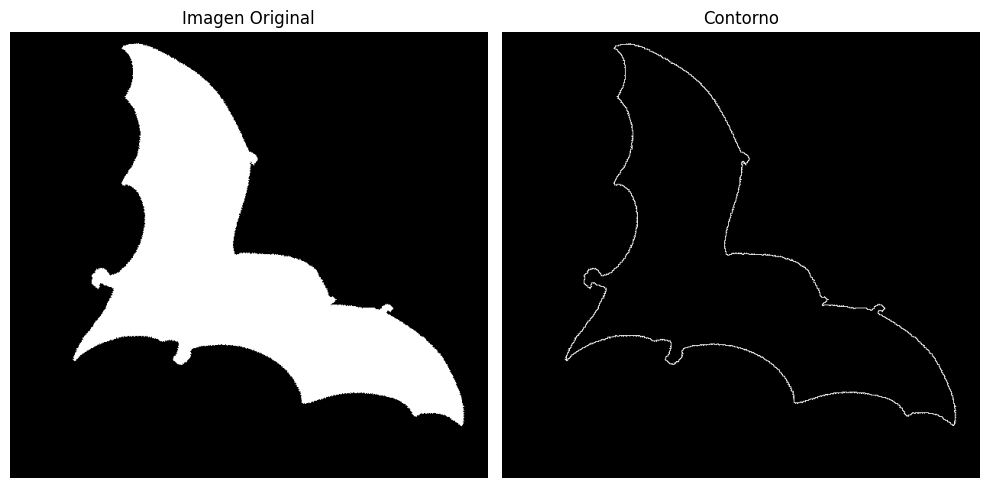

In [14]:
from PIL import Image
import matplotlib.pyplot as plt


def obtener_contorno(path: str) -> tuple[Image, Image]:
  img = Image.open(f'./Dataset/{path}')
  rgb_matriz = np.array(img)
  pixel_matriz = tuple(map(binarizar_row, rgb_matriz))

  return calcular_contorno(pixel_matriz), Image.fromarray(
    (rgb_matriz * 255).astype(np.uint8)
  )


def mostrar_imagen_y_contorno(path: str):
  contorno, img = obtener_contorno(path)

  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  axes[0].imshow(img, cmap="gray")
  axes[0].set_title("Imagen Original")
  axes[0].axis("off")

  axes[1].imshow(contorno, cmap="gray")
  axes[1].set_title("Contorno")
  axes[1].axis("off")

  plt.tight_layout()
  plt.show()

mostrar_imagen_y_contorno('murcielago.jpg')
